In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from data_generation import sigmoid_fn, linear_fn, exp_fn, log_fn, yield_time_x

In [39]:
raw_data = pd.read_excel("Example Raw data.xlsx",sheet_name="Raw P2", skiprows=10, nrows=93)

settings =  pd.read_excel("Example Raw data.xlsx",sheet_name="settings")

raw_data

,Time,T° Read 1:472,A1,A2,A3,A4,A5,A6,A7,A8,...,H3,H4,H5,H6,H7,H8,H9,H10,H11,H12
0,00:00:07,25.1,0.0696,0.0789,0.0764,0.0753,0.0709,0.0732,0.0753,0.0723,...,0.0694,0.0749,0.0786,0.0793,0.0719,0.0757,0.0664,0.0764,0.0718,0.0724
1,00:01:07,25.0,0.0711,0.0757,0.0745,0.0743,0.0739,0.0755,0.0717,0.0731,...,0.0702,0.0783,0.0821,0.0825,0.0725,0.0758,0.0684,0.0780,0.0727,0.0724
2,00:02:07,25.0,0.0734,0.0781,0.0773,0.0762,0.0753,0.0789,0.0712,0.0725,...,0.0704,0.0804,0.0860,0.0862,0.0722,0.0760,0.0722,0.0783,0.0733,0.0727
3,00:03:07,25.0,0.0753,0.0803,0.0796,0.0786,0.0777,0.0814,0.0715,0.0715,...,0.0705,0.0840,0.0901,0.0903,0.0727,0.0766,0.0722,0.0790,0.0735,0.0732
4,00:04:07,25.0,0.0776,0.0823,0.0817,0.0810,0.0808,0.0836,0.0726,0.0718,...,0.0709,0.0871,0.0941,0.0941,0.0730,0.0769,0.0730,0.0794,0.0739,0.0738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,01:28:07,25.2,0.2248,0.2324,0.2439,0.2360,0.2380,0.2566,0.1180,0.0853,...,0.0874,0.2630,0.3121,0.3006,0.0850,0.1178,0.1067,0.1152,0.0992,0.1228
89,01:29:07,25.2,0.2265,0.2340,0.2451,0.2374,0.2394,0.2581,0.1186,0.0856,...,0.0876,0.2643,0.3140,0.3021,0.0851,0.1162,0.1072,0.1156,0.0996,0.1234
90,01:30:07,25.2,0.2278,0.2351,0.2465,0.2387,0.2408,0.2594,0.1187,0.0857,...,0.0877,0.2658,0.3156,0.3036,0.0853,0.1169,0.1076,0.1160,0.0998,0.1239
91,01:31:07,25.2,0.2286,0.2368,0.2480,0.2402,0.2421,0.2609,0.1195,0.0859,...,0.0878,0.2671,0.3175,0.3055,0.0854,0.1207,0.1079,0.1165,0.1003,0.1245


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92]


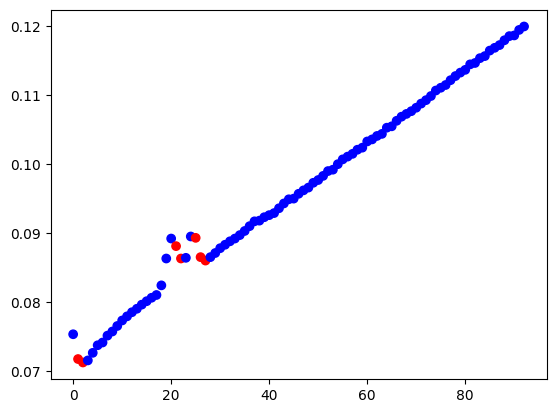

In [40]:
line = raw_data["A7"]
time = raw_data["Time"]
num_points = len(line)

x = []

for i in range(0,num_points):
    x.append(i)
    i += 1

highlight_color = 'red'
default_color = 'blue'
interval_color = 'green'
colors = [default_color] * num_points

counter = 0
increasing = []

for i in range(1,num_points):
  if line[i] > line[i-1]:
    increasing.append(line[i])
  else:
    increasing = [line[i]]
    counter += 1
    colors[i] = highlight_color

if counter == 0:
   increasing = line.to_numpy()
else:
   increasing = np.array(increasing)

print(x)
plt.scatter(x,line, c= colors)


In [41]:
params = {
    'sigmoid': (0.95, 7, 3),
    'linear': (0.15, 0.1),
    'exp': (0.2, 0.3),
    'log': (0.6, 0)
}

np.int64(18)

In [46]:
scores = []
y_vals = line
t_vals = np.array(x)

# Fitting sigmoidal function. (Manually calculate L, and t0)
L = max(y_vals)
slopes  = np.diff(y_vals) / np.diff(t_vals)
t0_ind = np.argmax(slopes)
t0 = t_vals[t0_ind]
z = np.log(L / y_vals - 1 + 1e10)
X = (t_vals - t0).reshape(-1,1)

model = LinearRegression(fit_intercept=False).fit(X, z)
coef, const = model.coef_[0], model.intercept_
params['sigmoid'] = L, coef, t0
y_pred = sigmoid_fn(t_vals, L, coef, t0)
score = r2_score(y_vals, y_pred)
scores.append(score)

#Fitting linear model
X = t_vals.reshape(-1,1)

model = LinearRegression().fit(X, y_vals)
coef, const, score = model.coef_[0], model.intercept_, model.score(X, y_vals)
params['linear'] = coef, const
scores.append(score)

#Fitting exponential model
mask = y_vals > 0
X = t_vals[mask].reshape(-1, 1)
z = np.log(y_vals[mask])

model = LinearRegression().fit(X, z)
coef, const, score = model.coef_[0], np.exp(model.intercept_), model.score(X, z)
params['exp'] = coef, const
scores.append(score)

#Fitting logarithmic model
X = np.log(t_vals).reshape(-1, 1)
X[X < 0] = 0
z = y_vals

model = LinearRegression().fit(X, y_vals)
coef, const, y_pred = model.coef_[0], model.intercept_, model.predict(X)
y_pred[y_pred < 0] = 0
score = r2_score(y_vals, y_pred)
params['log'] = coef, const
scores.append(score)

#Picking best model and finding slope
best_fit = list(params.keys())[np.argmax(scores)]
print(f'sigmoid {scores[0]}')
print(f'linear {scores[1]}')
print(f'Exp {scores[2]}')
print(f'Log {scores[3]}')

if best_fit == 'linear':
    slope_avg_max_react_rate = params['linear'][0]
    print("Linear")

elif best_fit == 'sigmoid':
    slope_avg_max_react_rate = params['sigmoid'][2]
    print("Sigmoid")

elif best_fit == "exp":
    print("Exp")

elif best_fit == "log":
    print("Log")


# use predetermined method to find max slope
#     for if 'exp' max slope is always at end of interval
#     or if 'log' max slope is at start of interval
#     or if 'sigmoid' max slope at t_0 (3rd input in params)

sigmoid -5.315340677821305
linear 0.9906191719052132
Exp 0.9819137330934223
Log 0.7945880524548574
Linear


C:\Users\pc\AppData\Local\Temp\ipykernel_23860\3567685143.py:39: RuntimeWarning: divide by zero encountered in log
  X = np.log(t_vals).reshape(-1, 1)
